In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import random
from pathlib import Path

import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [11]:
matplotlib.rcParams['figure.figsize'] = (12,12)

In [12]:
# configuration
bs2bk_ratio = 0.5

In [18]:
#function area
def base2back_dim_ratio(base_img, back_img, ratio=0.5, rtype='w'):
    hbk, wbk = back_image.shape[:2]
    hbs, wbs = base_image.shape[:2]
    hbk_ratio, wbk_ratio = ratio * hbk, ratio * wbk
    if rtype=='w':
        vratio = wbk_ratio
        vratio = vratio / wbs
    elif rtype=='h':
        vratio = hbk_ratio
        vratio = vratio / wbs

    wnbs, hnbs = vratio * wbs, vratio*hbs
    return int(hnbs), int(wnbs)


def rand_gen(max_val, limit_val):
    repeat, result = True, max_val
    while repeat:
        result = random.randint(0, max_val)
        if (result - limit_val) > 0: repeat = False
    return result

def random_safe_box_location(back_size, base_size):
    hbk, wbk = back_size
    hbs, wbs = base_size

    xmax, ymax = rand_gen(wbk, wbs), rand_gen(hbk, hbs)
    xmin, ymin = xmax - wbs, ymax - hbs

    return xmin, ymin, xmax, ymax

def overlay_transparent(background_image, overlay_image):
    img1, img2  = background_image.copy(), overlay_image.copy()
    h,w = img1.shape[:2]
    result = np.zeros((h,w,3), np.uint8)

    alpha = img2[:, :, 3] / 255.0
    result[:, :, 0] = (1. - alpha) * img1[:, :, 0] + alpha * img2[:, :, 0]
    result[:, :, 1] = (1. - alpha) * img1[:, :, 1] + alpha * img2[:, :, 1]
    result[:, :, 2] = (1. - alpha) * img1[:, :, 2] + alpha * img2[:, :, 2]

    return result


def image_selection(img, val = 0):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return (gray>val).astype(np.uint8)

In [14]:
base_path = Path('../data/')
base_impath = str(base_path.joinpath('idcard/base1.png'))
back_impath = str(base_path.joinpath('background/img1.jpg'))

In [15]:
base_image = cv.imread(base_impath, cv.IMREAD_UNCHANGED)
back_image = cv.imread(back_impath, cv.IMREAD_COLOR)

base_selection = image_selection(base_image)



In [19]:
bs_size = base_image.shape[:2]
hbs, wbs = bs_size

bk_size = back_image.shape[:2]
hbk, wbk = bk_size

bsn_size = base2back_dim_ratio(base_image, back_image, ratio=0.25)
bsn_dsize = (bsn_size[1], bsn_size[0])
hbsn, wbsn = bsn_size


base_selection_resized = cv.resize(base_selection.copy(), dsize=bsn_dsize)
base_image_resized = cv.resize(base_image.copy(), dsize=bsn_dsize)


In [26]:
base_box = random_safe_box_location(bk_size, bsn_size)
xmin, ymin, xmax, ymax = base_box

base_image_segment = np.zeros(bk_size)
base_image_segment[ymin:ymax, xmin:xmax] = base_selection_resized

base_image_overlay=np.zeros((hbk,wbk,4), np.uint8)
base_image_overlay[ymin:ymax, xmin:xmax] = base_image_resized
result = overlay_transparent(back_image, base_image_overlay)


In [27]:
# base_image_overlay

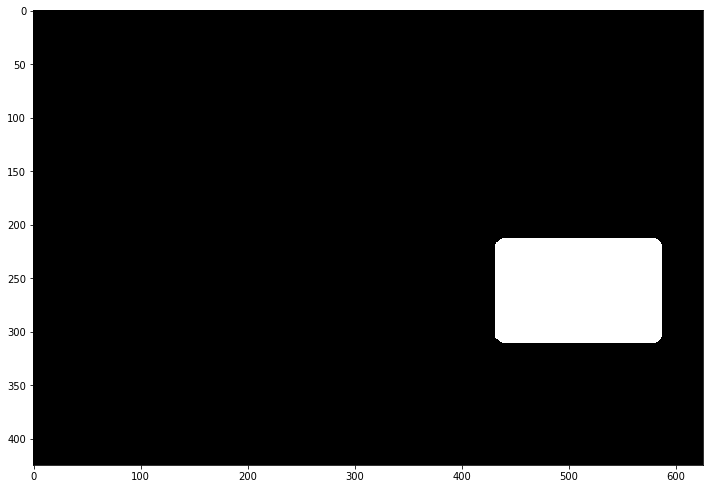

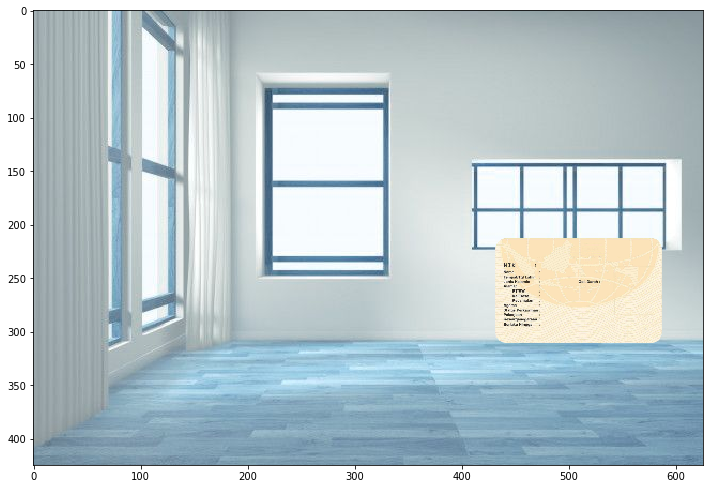

In [28]:
plt.imshow(base_image_segment, cmap='gray');plt.show()
plt.imshow(result)





